Dataset Reference : https://www.kaggle.com/code/tariqbashir/financial-application-behavior/input?select=Financial_+Application_+Behavior_+Dataset.csv

# Business Problem

A Fin-Tech company launched a mobile app for financial services like loans and savings, offering free and premium versions. To boost premium sales with minimal ads, they provided a 24-hour trial of premium features to analyze user behavior.

A Machine Learning Engineer was hired to predict which customers are likely to buy the premium version. The goal is to avoid offering discounts to customers who would purchase anyway and target those interested but unable to afford it, maximizing profit.

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [71]:
finTech_data = pd.read_csv('FineTech_appData.csv')
finTech_data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [72]:
finTech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [73]:
finTech_data.shape   # 50000 rows, 12 columns

(50000, 12)

In [74]:
finTech_data.isnull().sum()     

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [75]:
finTech_data.select_dtypes(include='object').columns  # list of categorical columns

Index(['first_open', 'hour', 'screen_list', 'enrolled_date'], dtype='object')

In [76]:
finTech_data.select_dtypes(include=['int64', 'float64']).columns    # list of numerical columns 

Index(['user', 'dayofweek', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

In [77]:
finTech_data.describe()  # Statistical measurements

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
finTech_data['hour'] = finTech_data.hour.str.slice(1,3).astype(int)

In [79]:
finTech_data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [80]:
finTech_data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [81]:
finTech_data_2 = finTech_data.drop(['user', 'first_open', 'screen_list', 'enrolled_date' ], axis=1)

In [82]:
finTech_data_2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


#### Data Visualization

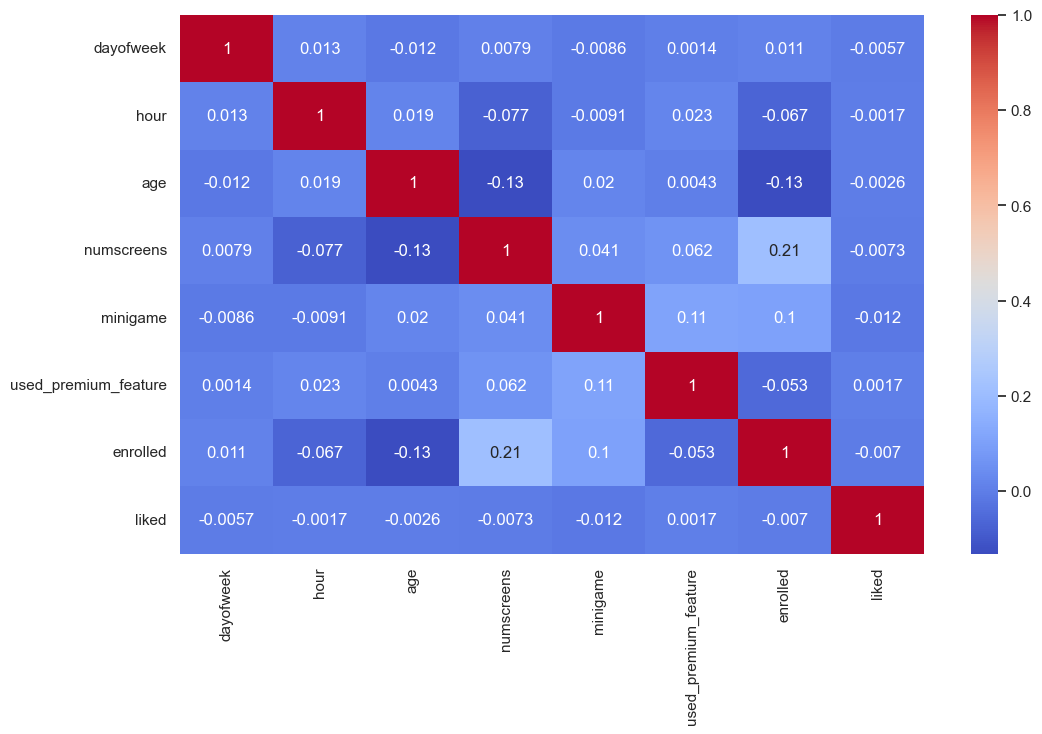

In [83]:
plt.figure(figsize=(12,7))
sns.heatmap(finTech_data_2.corr(), annot=True, cmap='coolwarm')
plt.show()

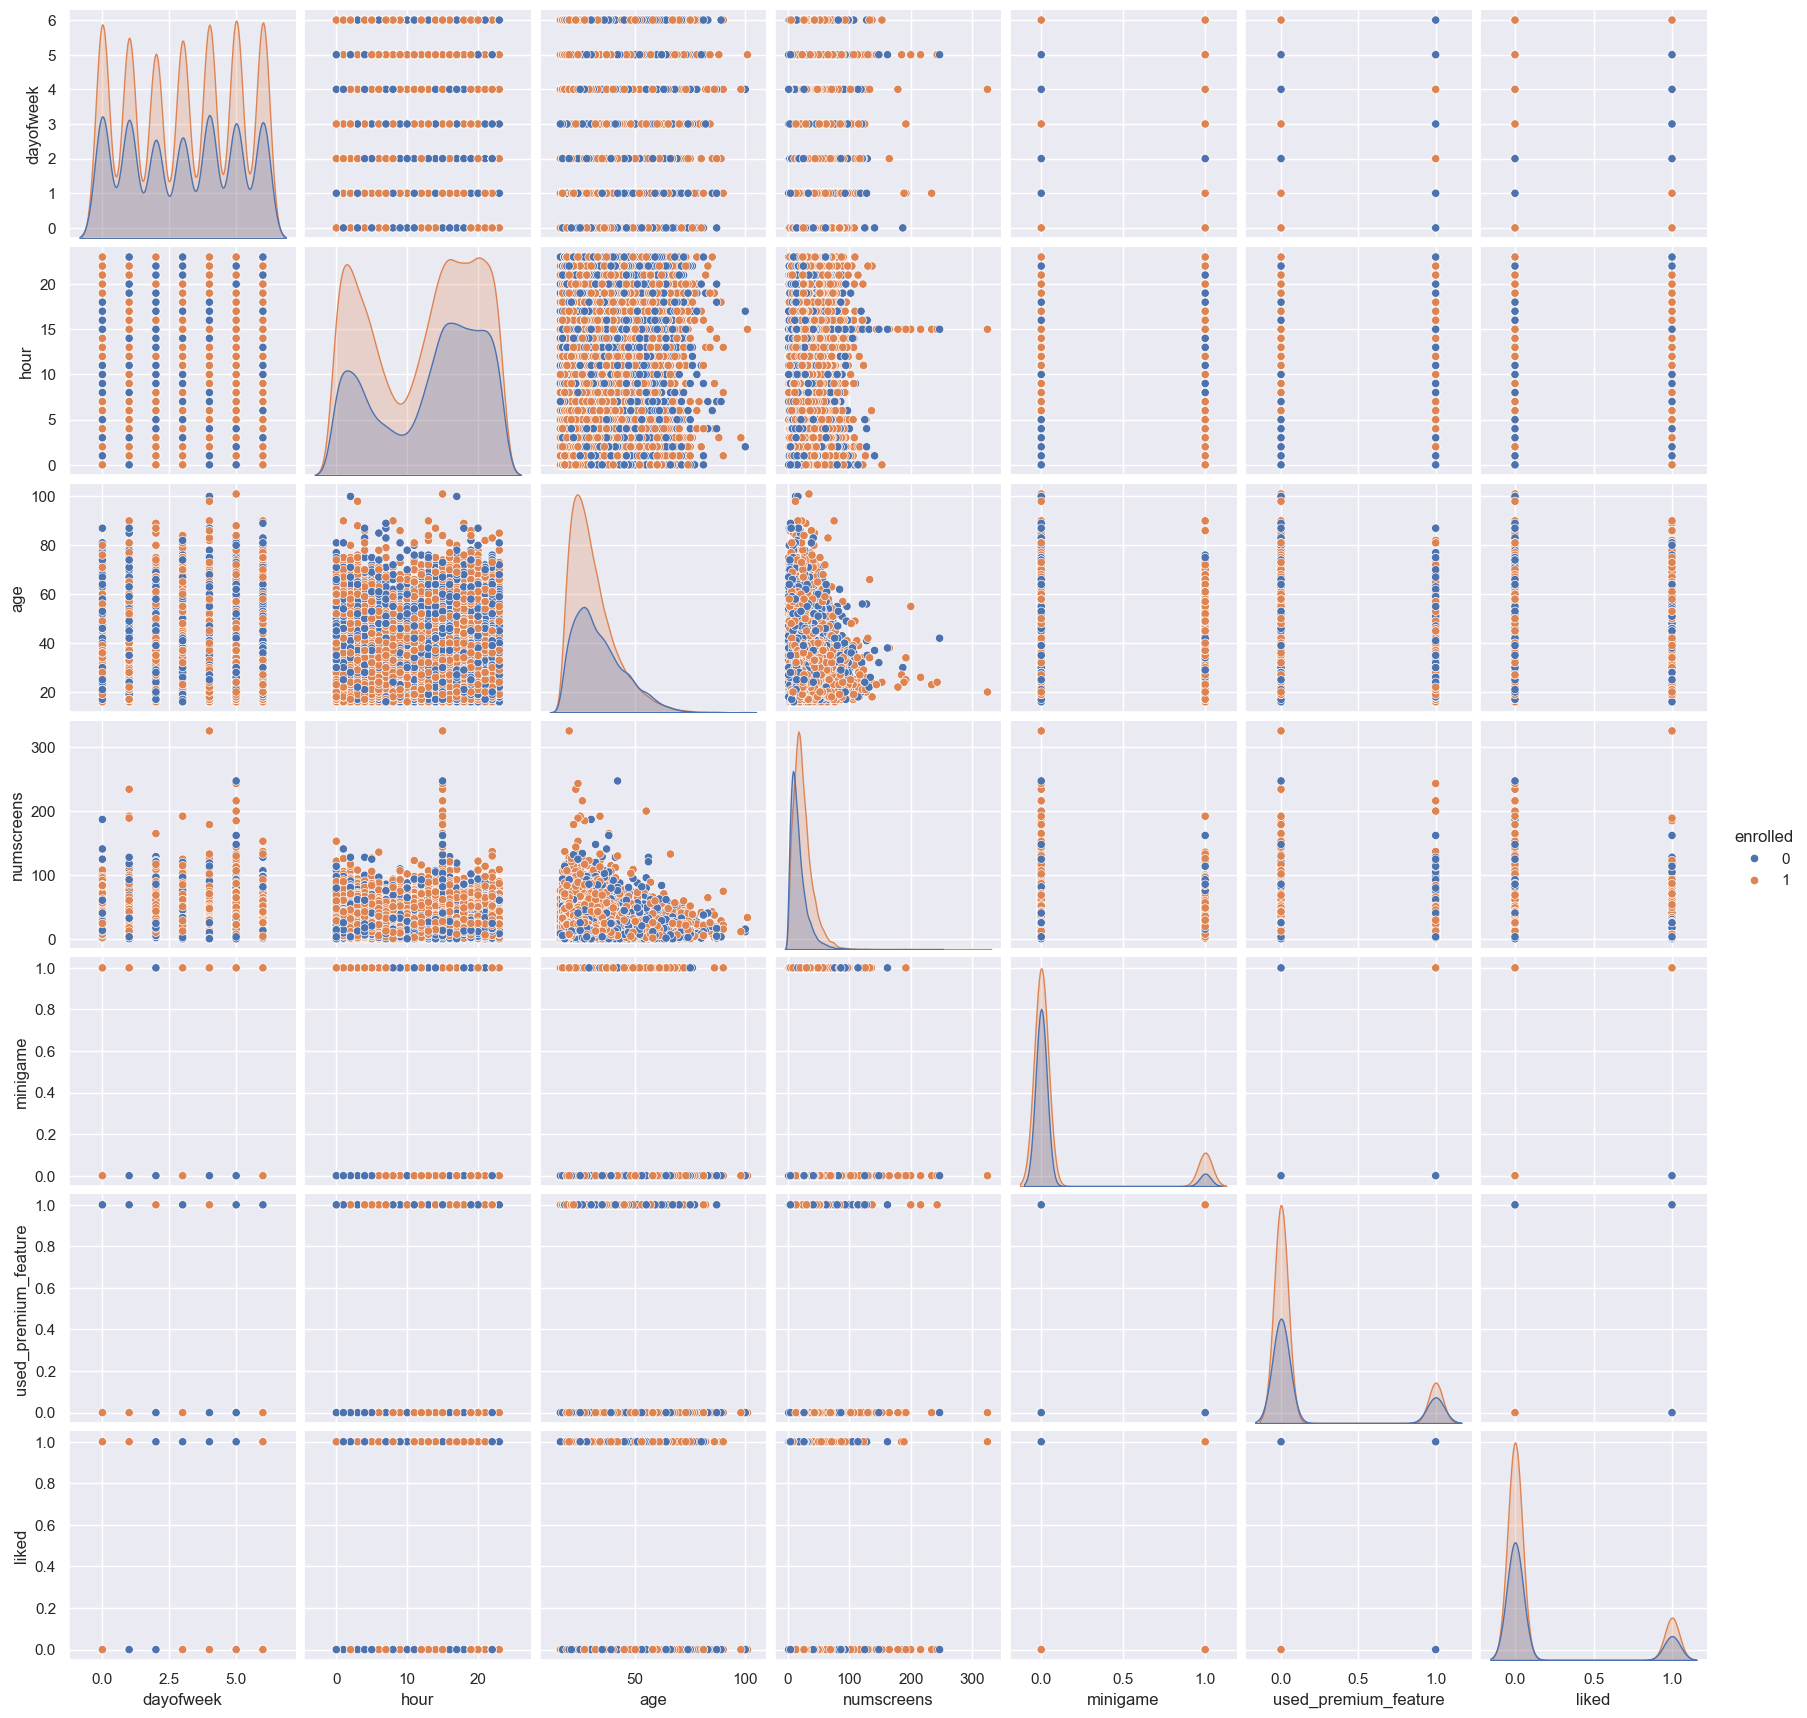

In [84]:
sns.pairplot(finTech_data_2, hue='enrolled')
plt.show()

In [85]:
print("Not Enrolled User", (finTech_data_2.enrolled < 1).sum(), "Out of 50000")
print("Enrolled Users", 50000 - (finTech_data_2.enrolled < 1).sum(), "Out of 50000")

Not Enrolled User 18926 Out of 50000
Enrolled Users 31074 Out of 50000


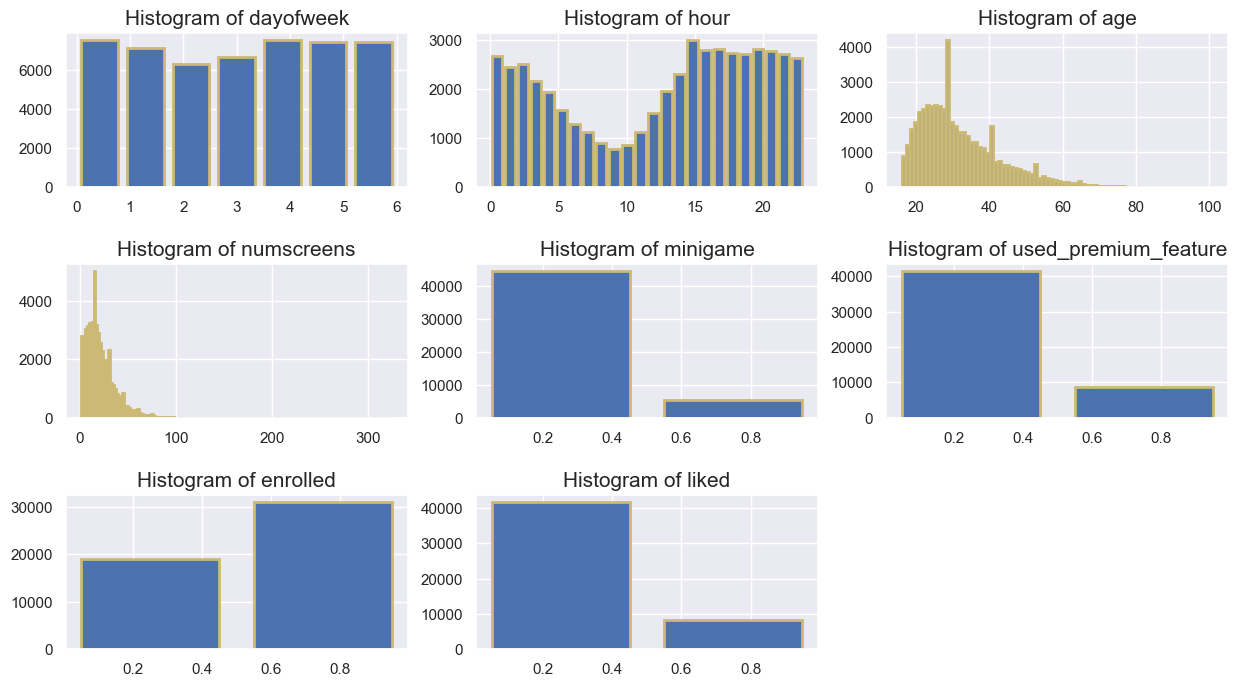

In [86]:
plt.figure(figsize = (15,8)) 
features = finTech_data_2.columns 
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(finTech_data_2[j].unique()) # bins for histogram
    plt.hist(finTech_data_2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) 

In [87]:

# parsing object data into data time format
 
finTech_data['first_open'] =[parser.parse(i) for i in finTech_data['first_open']]
 
finTech_data['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in finTech_data['enrolled_date']]
 
finTech_data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [88]:
finTech_data['time_to_enrolled'] = (finTech_data.enrolled_date - finTech_data.first_open) / pd.Timedelta(hours=1)


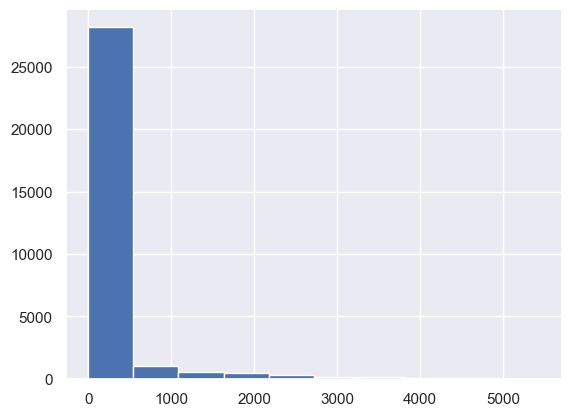

In [89]:
# Plot histogram
plt.hist(finTech_data['time_to_enrolled'].dropna())
plt.show()


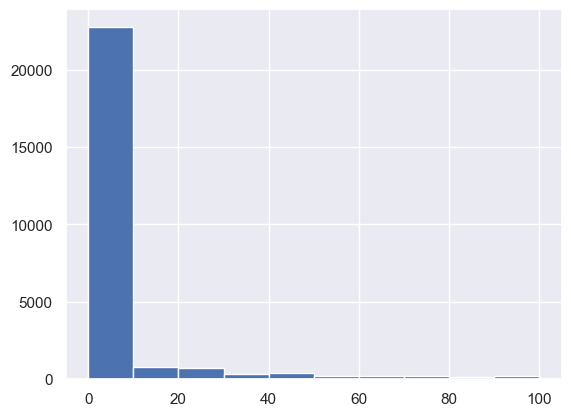

In [90]:
	
# Plot histogram
plt.hist(finTech_data['time_to_enrolled'].dropna(), range = (0,100))  
plt.show()

#### Feature selection

In [91]:

# Those customers have enrolled after 48 hours set as 0
finTech_data.loc[finTech_data.time_to_enrolled > 48, 'enrolled'] = 0

In [92]:
finTech_data.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [93]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv('top_screens.csv').top_screens.values
 
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [94]:
finTech_data['screen_list'] = finTech_data.screen_list.astype(str) + ','

In [95]:
# string into to number
 
for screen_name in fineTech_app_screen_Data:
    finTech_data[screen_name] = finTech_data.screen_list.str.contains(screen_name).astype(int)
    finTech_data['screen_list'] = finTech_data.screen_list.str.replace(screen_name+",", "")

In [96]:
finTech_data.shape

(50000, 68)

In [97]:
finTech_data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# remain screen in 'screen_list'
finTech_data.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [99]:
finTech_data['remain_screen_list'] = finTech_data.screen_list.str.count(",")

In [100]:
finTech_data.drop(columns = ['screen_list'], inplace=True)

In [101]:
finTech_data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [102]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
finTech_data['saving_screens_count'] = finTech_data[saving_screens].sum(axis = 1)
finTech_data.drop(columns = saving_screens, inplace = True)

In [103]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
finTech_data['credit_screens_count'] = finTech_data[credit_screens].sum(axis = 1)
finTech_data.drop(columns = credit_screens, axis = 1, inplace = True)


In [104]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
finTech_data['cc_screens_count'] = finTech_data[cc_screens].sum(axis = 1)
finTech_data.drop(columns = cc_screens, inplace = True)

In [105]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
finTech_data['loan_screens_count'] = finTech_data[loan_screens].sum(axis = 1)
finTech_data.drop(columns = loan_screens, inplace = True)


In [106]:
finTech_data.shape

(50000, 50)

In [107]:
finTech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [108]:
finTech_data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.495740,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499987,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [109]:
finTech_data.to_csv('Clean_FinTech_Data.csv')

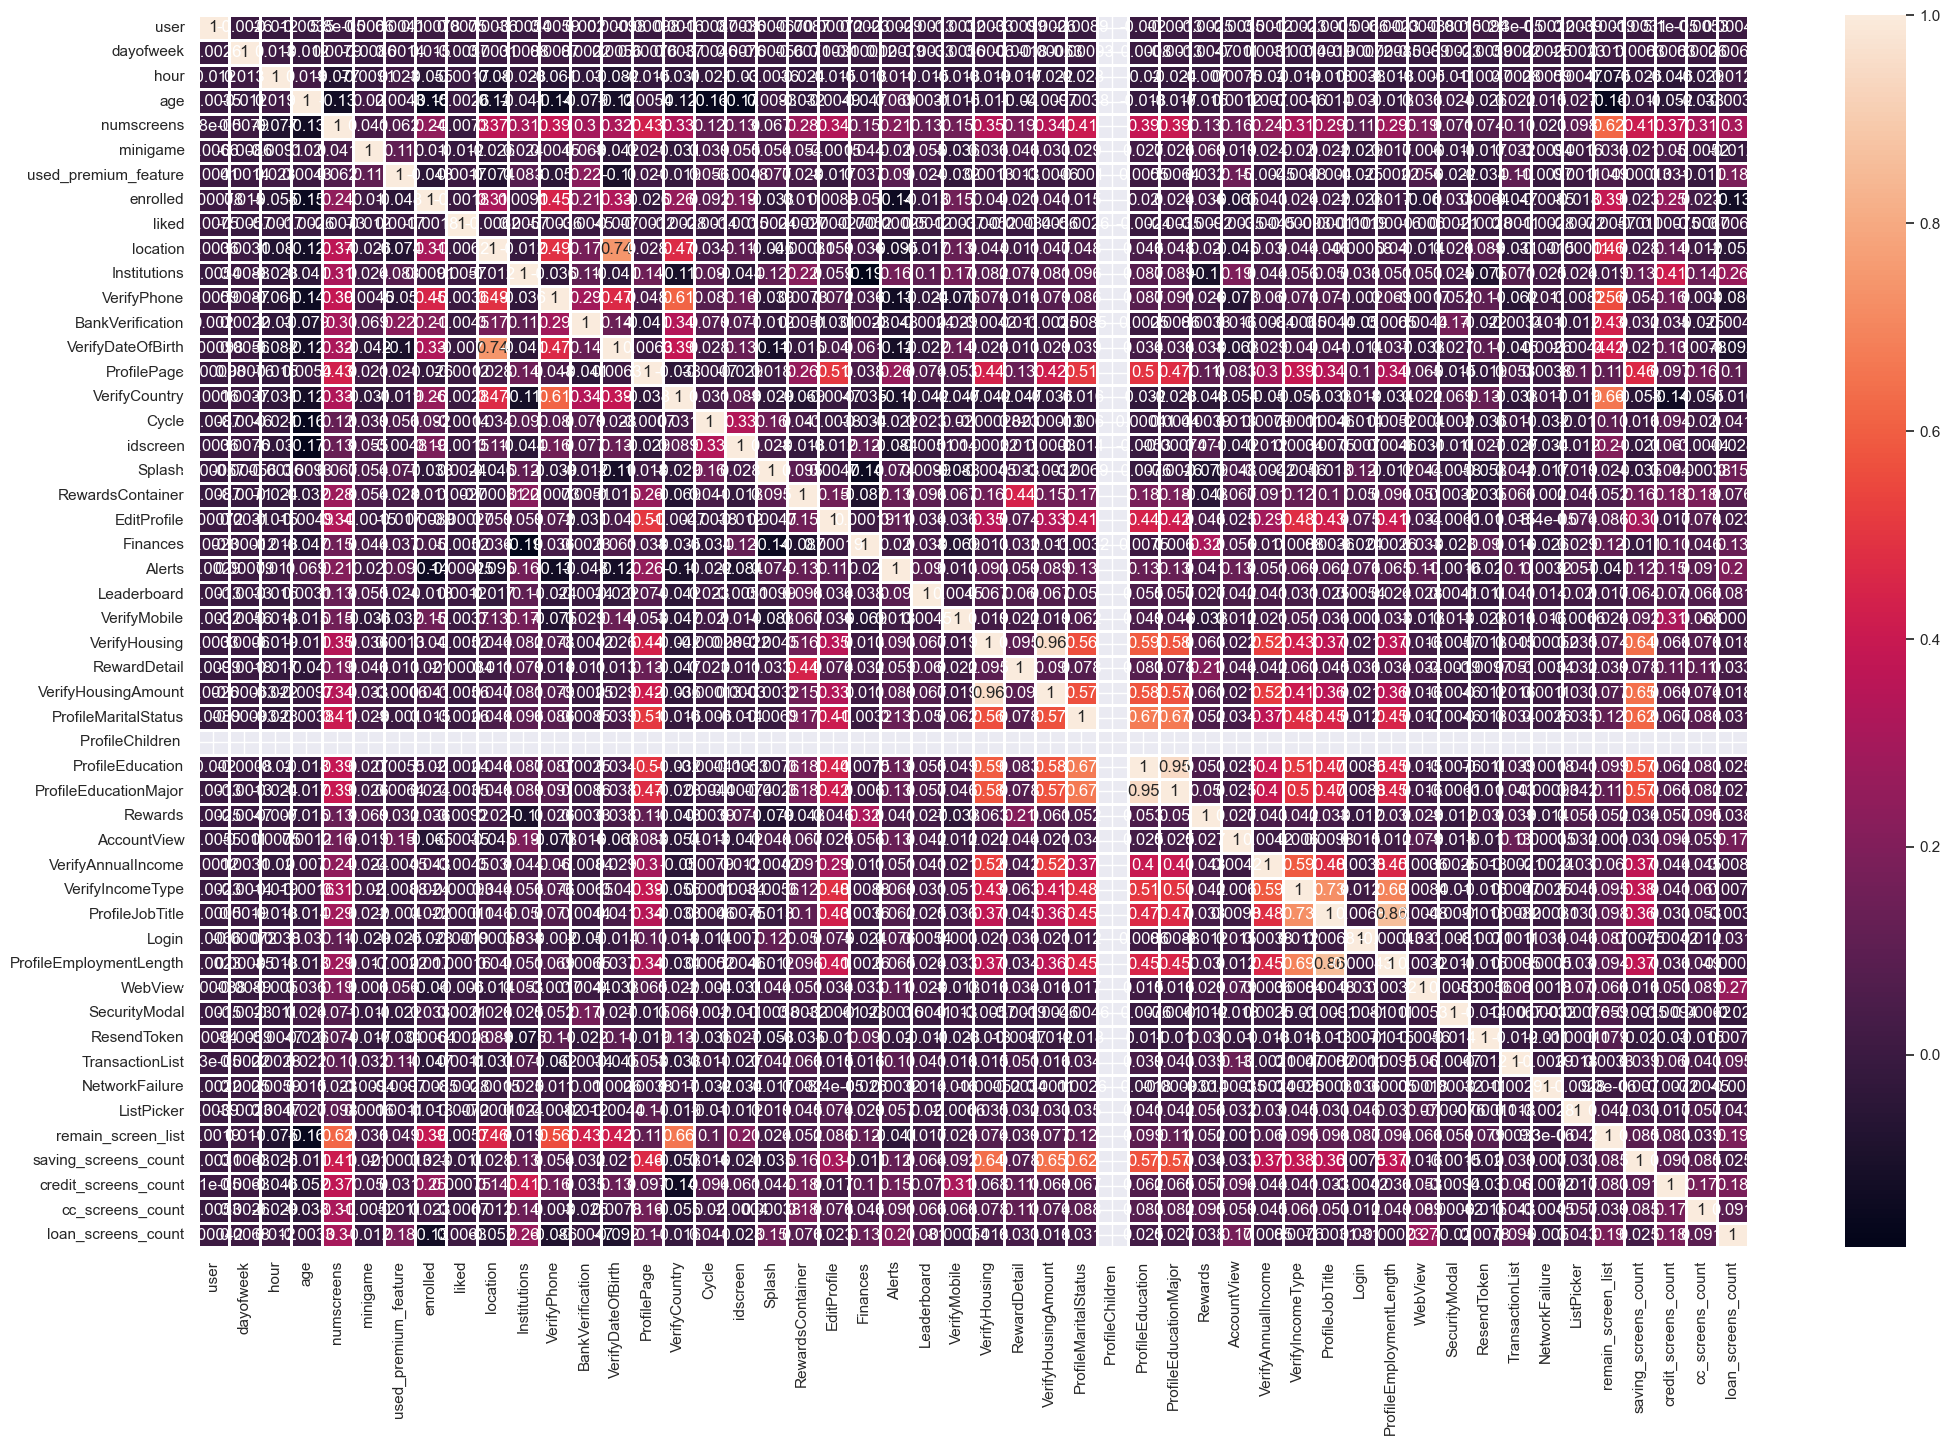

In [110]:
plt.figure(figsize = (25,16)) 
sns.heatmap(finTech_data.corr(), annot = True, linewidth =2)
plt.show()

### Data preprocessing

In [111]:
clean_fineTech_appData = finTech_data
target = finTech_data['enrolled']
finTech_data.drop(columns = 'enrolled', inplace = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finTech_data, target, test_size = 0.2, random_state = 0)

In [112]:

print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [113]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [114]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


### Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Machine Learning Model Building

	
## Decision Tree Classifier


In [116]:
Decision_Tree_Model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
Decision_Tree_Model.fit(X_train, y_train)
y_pred_dt = Decision_Tree_Model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7036

In [ ]:
# train with standard Scaling dataset
Decision_Tree_Model_2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
Decision_Tree_Model_2.fit(X_train_sc, y_train)
y_pred_dt_sc = Decision_Tree_Model_2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7031

## K – Nearest Neighbor Classifier


In [118]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.6982

In [ ]:
# train with standard Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

0.732

## Naive Bayes Classifier

In [120]:
Naive_Bayes_Model = GaussianNB()
Naive_Bayes_Model.fit(X_train, y_train)
y_pred_nb = Naive_Bayes_Model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7116

In [ ]:
# train with standard Scaling dataset
Naive_Bayes_Model_2 = GaussianNB()
Naive_Bayes_Model_2.fit(X_train_sc, y_train)
y_pred_nb_sc = Naive_Bayes_Model_2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

0.7116

## Random Forest Classifier


In [122]:
Random_Forest_Model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
Random_Forest_Model.fit(X_train, y_train)
y_pred_rf = Random_Forest_Model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7613

In [ ]:
# train with standard Scaling dataset
Random_Forest_Model_2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
Random_Forest_Model_2.fit(X_train_sc, y_train)
y_pred_rf_sc = Random_Forest_Model_2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7612

## Logistic Regression

In [125]:
Logistic_Regression_Model = LogisticRegression(random_state = 0, penalty = 'l1',solver='liblinear')
Logistic_Regression_Model.fit(X_train, y_train)
y_pred_lr = Logistic_Regression_Model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

0.7691

In [127]:
# train with standard Scaling dataset
Logistic_Regression_Model_2 = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')
Logistic_Regression_Model_2.fit(X_train_sc, y_train)
y_pred_lr_sc = Logistic_Regression_Model_2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.769

## Support Vector Classifier

In [129]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7616

In [130]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.7794

## XGBoost Classifier

In [133]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.785

In [134]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

0.785

In [135]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)

0.7891

In [136]:
# XGB classifier with parameter tuning
# train with Standard Scaled dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7891

TakeAway : We observe that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

## Confusion Matrix

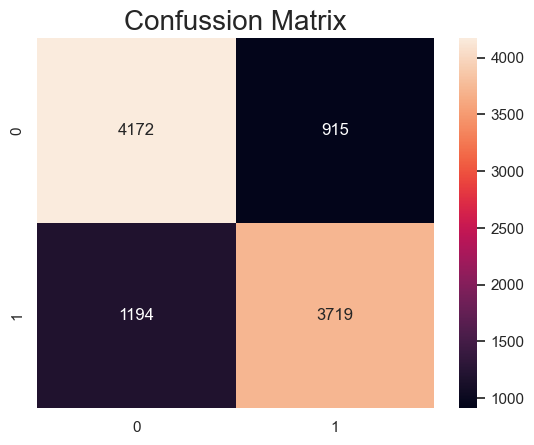

In [138]:
Confusin_matrix_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(Confusin_matrix_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 
plt.show()

### Classification report of ML model

In [139]:
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5087
           1       0.80      0.76      0.78      4913

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



### Cross-validation of the ML model

In [140]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.7925  0.778   0.789   0.78425 0.7795  0.78825 0.7925  0.7805  0.791
 0.777  ]
Cross validation of XGBoost model (in mean) =  0.78525


### Mapping predicted output to the target

In [141]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]


For further analysis we can save the model with pkl. 
We have completed the Machine learning Project successfully with 78.87% accuracy which is great for ‘Directing Customers to Subscription Through Financial App Behavior Analysis’ project.